In [32]:
# Initial imports.
import pandas as pd
import numpy as np
from path import Path
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import export_graphviz
import sqlite3

In [33]:
conn = sqlite3.connect('../HomelessData.db')
c = conn.cursor()

In [34]:
# Loading data
df_2019 = pd.read_sql("SELECT * FROM CocData WHERE year = 2019", con = conn)

df_2019.head()

,Coc,TotalBeds,Emergency,Transitional,SafeHaven,RapidRehousing,PermanentSupportive,PermanentOther,Year,CocYear,TotalHomeless,Unsheltered,Sheltered,Population,Unemployment
0,AK-500,1033,799,234,0,171,601,71,2019,AK-500 2019,1111,97,1014,288000.0,4.400000
1,AK-501,845,575,270,0,67,386,0,2019,AK-501 2019,796,176,620,425343.0,6.991667
2,AL-500,827,516,277,34,106,1740,0,2019,AL-500 2019,981,326,655,965787.0,2.600000
3,AL-501,394,261,133,0,31,240,0,2019,AL-501 2019,505,202,303,636444.0,3.250000
4,AL-502,189,106,83,0,0,42,8,2019,AL-502 2019,390,201,189,209041.0,3.350000


In [35]:
df_2019=df_2019.drop(['TotalHomeless', 'Sheltered', 'TotalBeds', 'CocYear', 'Coc', 'Year'], axis=1)

In [36]:
#df_2019['Unsheltered_div_pop'] = df_2019['Unsheltered'] / df_2019['Population']

In [37]:
#df_2019.head()

In [38]:
df_2019['Unsheltered_perc_pop'] = (df_2019['Unsheltered'] / df_2019['Population']) *100

In [39]:
df_2019.head()

,Emergency,Transitional,SafeHaven,RapidRehousing,PermanentSupportive,PermanentOther,Unsheltered,Population,Unemployment,Unsheltered_perc_pop
0,799,234,0,171,601,71,97,288000.0,4.400000,0.033681
1,575,270,0,67,386,0,176,425343.0,6.991667,0.041378
2,516,277,34,106,1740,0,326,965787.0,2.600000,0.033755
3,261,133,0,31,240,0,202,636444.0,3.250000,0.031739
4,106,83,0,0,42,8,201,209041.0,3.350000,0.096153


In [40]:
df_2019['ES_beds_perc_pop'] = (df_2019['Emergency'] / df_2019['Population']) *100

In [41]:
df_2019['TS_beds_perc_pop'] = (df_2019['Transitional'] / df_2019['Population']) *100

In [42]:
df_2019['SH_beds_perc_pop'] = (df_2019['SafeHaven'] / df_2019['Population']) *100

In [43]:
df_2019['RRH_units_perc_pop'] = (df_2019['RapidRehousing'] / df_2019['Population']) *100

In [44]:
df_2019['RRH_units_perc_pop'] = (df_2019['RapidRehousing'] / df_2019['Population']) *100

In [45]:
df_2019['PSH_units_perc_pop'] = (df_2019['PermanentSupportive'] / df_2019['Population']) *100

In [46]:
df_2019['OPH_units_perc_pop'] = (df_2019['PermanentOther'] / df_2019['Population']) *100

In [47]:
df_2019.head()

,Emergency,Transitional,SafeHaven,RapidRehousing,PermanentSupportive,PermanentOther,Unsheltered,Population,Unemployment,Unsheltered_perc_pop,ES_beds_perc_pop,TS_beds_perc_pop,SH_beds_perc_pop,RRH_units_perc_pop,PSH_units_perc_pop,OPH_units_perc_pop
0,799,234,0,171,601,71,97,288000.0,4.400000,0.033681,0.277431,0.081250,0.00000,0.059375,0.208681,0.024653
1,575,270,0,67,386,0,176,425343.0,6.991667,0.041378,0.135185,0.063478,0.00000,0.015752,0.090750,0.000000
2,516,277,34,106,1740,0,326,965787.0,2.600000,0.033755,0.053428,0.028681,0.00352,0.010976,0.180164,0.000000
3,261,133,0,31,240,0,202,636444.0,3.250000,0.031739,0.041009,0.020897,0.00000,0.004871,0.037710,0.000000
4,106,83,0,0,42,8,201,209041.0,3.350000,0.096153,0.050708,0.039705,0.00000,0.000000,0.020092,0.003827


In [48]:
df_2019=df_2019.drop(['Emergency', 'Transitional', 'SafeHaven', 'RapidRehousing', 'PermanentSupportive', 'PermanentOther', 'Unsheltered'], axis=1)

In [49]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            368 non-null    float64
 1   Unemployment          368 non-null    float64
 2   Unsheltered_perc_pop  368 non-null    float64
 3   ES_beds_perc_pop      368 non-null    float64
 4   TS_beds_perc_pop      368 non-null    float64
 5   SH_beds_perc_pop      368 non-null    float64
 6   RRH_units_perc_pop    368 non-null    float64
 7   PSH_units_perc_pop    368 non-null    float64
 8   OPH_units_perc_pop    368 non-null    float64
dtypes: float64(9)
memory usage: 26.0 KB


In [50]:
df_2019.head()

,Population,Unemployment,Unsheltered_perc_pop,ES_beds_perc_pop,TS_beds_perc_pop,SH_beds_perc_pop,RRH_units_perc_pop,PSH_units_perc_pop,OPH_units_perc_pop
0,288000.0,4.400000,0.033681,0.277431,0.081250,0.00000,0.059375,0.208681,0.024653
1,425343.0,6.991667,0.041378,0.135185,0.063478,0.00000,0.015752,0.090750,0.000000
2,965787.0,2.600000,0.033755,0.053428,0.028681,0.00352,0.010976,0.180164,0.000000
3,636444.0,3.250000,0.031739,0.041009,0.020897,0.00000,0.004871,0.037710,0.000000
4,209041.0,3.350000,0.096153,0.050708,0.039705,0.00000,0.000000,0.020092,0.003827


In [51]:
# Define the features set.
X = df_2019.copy()
X = X.drop("Unsheltered_perc_pop", axis=1)
X.head()

,Population,Unemployment,ES_beds_perc_pop,TS_beds_perc_pop,SH_beds_perc_pop,RRH_units_perc_pop,PSH_units_perc_pop,OPH_units_perc_pop
0,288000.0,4.400000,0.277431,0.081250,0.00000,0.059375,0.208681,0.024653
1,425343.0,6.991667,0.135185,0.063478,0.00000,0.015752,0.090750,0.000000
2,965787.0,2.600000,0.053428,0.028681,0.00352,0.010976,0.180164,0.000000
3,636444.0,3.250000,0.041009,0.020897,0.00000,0.004871,0.037710,0.000000
4,209041.0,3.350000,0.050708,0.039705,0.00000,0.000000,0.020092,0.003827


In [52]:
# Define the target set.
y = df_2019["Unsheltered_perc_pop"].ravel()
y[:5]

array([0.03368056, 0.04137837, 0.03375485, 0.03173885, 0.09615339])

In [53]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [54]:
regr = RandomForestRegressor(max_depth=3, random_state=0)

In [55]:
reg_model = regr.fit(X, y)

In [56]:
importances = reg_model.feature_importances_
importances

array([0.13044041, 0.1161672 , 0.06297293, 0.35691006, 0.00420326,
       0.21048371, 0.10083038, 0.01799206])

In [57]:
# We can sort the features by their importance.
sorted(zip(reg_model.feature_importances_, X.columns), reverse=True)

[(0.35691005792382247, 'TS_beds_perc_pop'),
 (0.2104837062244813, 'RRH_units_perc_pop'),
 (0.1304404135186838, 'Population'),
 (0.11616720081165587, 'Unemployment'),
 (0.10083037920389261, 'PSH_units_perc_pop'),
 (0.06297292698040392, 'ES_beds_perc_pop'),
 (0.017992058998664788, 'OPH_units_perc_pop'),
 (0.0042032563383952665, 'SH_beds_perc_pop')]

In [58]:
%matplotlib inline
from matplotlib import pyplot as plt

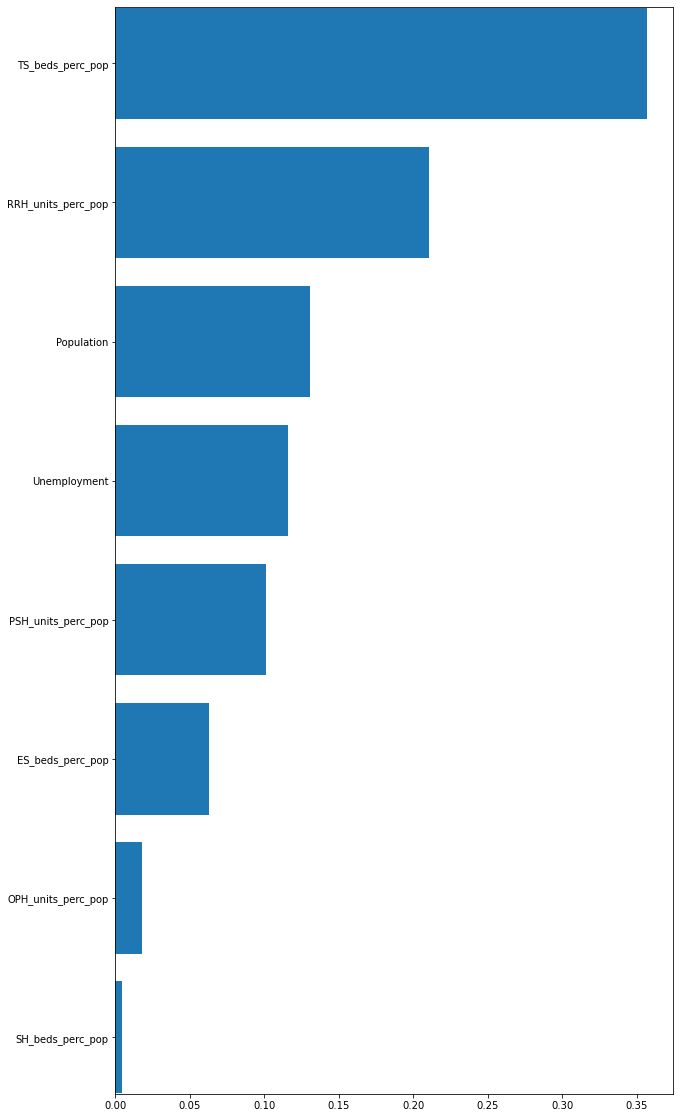

In [59]:
features = sorted(zip(X.columns, reg_model.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,20)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [60]:
estimator = reg_model.estimators_[5]

[Text(0.5416666666666666, 0.875, 'X[5] <= 0.068\nsquared_error = 0.013\nsamples = 232\nvalue = 0.06'),
 Text(0.3333333333333333, 0.625, 'X[3] <= 0.088\nsquared_error = 0.005\nsamples = 202\nvalue = 0.044'),
 Text(0.16666666666666666, 0.375, 'X[6] <= 0.115\nsquared_error = 0.004\nsamples = 188\nvalue = 0.038'),
 Text(0.08333333333333333, 0.125, 'squared_error = 0.001\nsamples = 149\nvalue = 0.028'),
 Text(0.25, 0.125, 'squared_error = 0.012\nsamples = 39\nvalue = 0.07'),
 Text(0.5, 0.375, 'X[1] <= 5.2\nsquared_error = 0.009\nsamples = 14\nvalue = 0.122'),
 Text(0.4166666666666667, 0.125, 'squared_error = 0.005\nsamples = 12\nvalue = 0.098'),
 Text(0.5833333333333334, 0.125, 'squared_error = 0.006\nsamples = 2\nvalue = 0.295'),
 Text(0.75, 0.625, 'X[5] <= 0.069\nsquared_error = 0.053\nsamples = 30\nvalue = 0.18'),
 Text(0.6666666666666666, 0.375, 'squared_error = 0.0\nsamples = 1\nvalue = 1.034'),
 Text(0.8333333333333334, 0.375, 'X[3] <= 0.065\nsquared_error = 0.037\nsamples = 29\nvalue

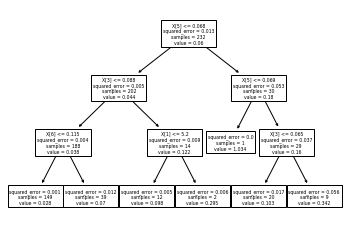

In [61]:
from sklearn import tree
tree.plot_tree(reg_model.estimators_[0])

In [62]:
df_2019.to_csv('2019_converted.csv', index=False)